In [1]:
import numpy as np
import panel as pn

In [2]:
from bokeh.plotting import figure as BkFigure

In [3]:
from libertem_ui.ui_context import UIContext
from libertem_ui.live_plot import ApertureFigure
from libertem_ui.display.display_base import DiskSet, PointSet
from libertem_ui.display.vectors import MultiLine
from libertem_ui.display.image_db import BokehImage

Row
    [0] Column
        [0] Column(margin=(0, 0))
            [0] Row(height=40, margin=(0, 0))
                [0] StaticText(align='center', margin=(5, 5), value='Display channel')
                [1] IntSlider(end=7, margin=(5, 5), width=200)
                [2] Toggle(height=2, margin=(5, 5, 5, 5), name='Image Controls', sizing_mode='fixed', tags=['a773b763-1c41-4530-89cc-...], visible=False, width=2)
                [3] FloatPanel(config={'headerControls': {'maxim...}, margin=20, name='Image Controls', objects=[Row
    [0] Select(name='...], visible=False)
            [1] Bokeh(figure)
        [1] FloatSlider(end=32, name='Disk radius', start=1.0, value=4.0)
    [1] Column
        [0] Column(margin=(0, 0))
            [0] Row(height=40, margin=(0, 0))
                [0] Toggle(height=2, margin=(5, 5, 5, 5), name='Image Controls', sizing_mode='fixed', tags=['d7d1f8a6-3c22-410e-a593-...], visible=False, width=2)
                [1] FloatPanel(config={'headerControls': {'maxim...}, margin=20, name='Image Controls', objects=[Row
    [0] Select(name='...], visible=False)
            [1] Bokeh(figure)
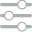
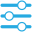
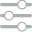
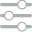
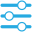
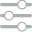

In [4]:
out_shape = (32, 32)
input_fig = ApertureFigure.new(
    np.random.uniform(size=(64, 64, 8)),
    title='Input',
    channel_dimension=-1,
)
disk = (
    DiskSet
    .new()
    .from_vectors([32], [32], 4)
    .on(input_fig.fig)
    .editable(add=False)
)
input_fig.fig.toolbar.active_drag = input_fig.fig.tools[-1]
slider = disk.get_radius_slider(max_r=32)

line = (
    MultiLine
    .new()
    .from_vectors(xs=[[16, 48]], ys=[[48, 16]])
    .on(input_fig.fig)
    .editable()
)
line.lines.line_width = 4
line.vertices.points.line_color = line.vertices.points.fill_color = line.lines.line_color = 'cyan'

output_fig = ApertureFigure.new(
    np.random.uniform(size=out_shape),
    title='Output',
)


def _update_output(attr, old, new):
    output_fig.im.update(
        np.random.uniform(size=out_shape)
    )

def _update_output_pn(e):
    _update_output(None, None, None)

# Need both callbacks as one is a panel event source, and one is a Bokeh event source
disk.cds.on_change('data', _update_output)
line.cds.on_change('data', _update_output)
slider.param.watch(_update_output_pn, 'value_throttled')

pn.Row(
    pn.Column(input_fig.layout, slider),
    pn.Column(output_fig.layout),
)

Row
    [0] Bokeh(figure)
    [1] Column(margin=(0, 0))
        [0] Row(height=40, margin=(0, 0))
            [0] Toggle(height=2, margin=(5, 5, 5, 5), name='Image Controls', sizing_mode='fixed', tags=['890b5450-d7e9-4775-a76e-...], visible=False, width=2)
            [1] FloatPanel(config={'headerControls': {'maxim...}, margin=20, name='Image Controls', objects=[Row
    [0] Select(name='...], visible=False)
        [1] Bokeh(figure)
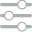
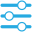
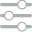

In [26]:
xy_fig = BkFigure(title='Shift')
points = (
    PointSet
    .new()
    .from_vectors(x=[0], y=[0])
    .on(xy_fig)
    .editable(add=False)
)
xy_fig.toolbar.active_drag = xy_fig.tools[-1]
xy_fig.y_range.flipped = True
xy_fig.y_range.update(start=10, end=-10)
xy_fig.x_range.update(start=-10, end=10)

align_fig = ApertureFigure.new(
    np.random.uniform(size=(64, 64)),
    title='Align',
)
overlay_img = (
    BokehImage
    .new()
    .from_numpy(np.random.uniform(size=(64, 64)))
    .on(align_fig.fig)
)
overlay_img.im.global_alpha = 0.5
overlay_img.color.change_cmap('blues')
# align_fig.im.color.change_cmap('greens')
static_im_renderer = [*align_fig.im.renderers_for_fig("image", align_fig.fig)]
align_fig.fig.x_range.renderers = align_fig.fig.y_range.renderers = static_im_renderer
align_fig.im.im.global_alpha = 0.5

def _update_align(attr, old, new):
    xy = dict(
        x=new['cx'][0],
        y=new['cy'][0],
    )
    overlay_img.set_anchor(**xy)
    xy_fig.title.text = f"Shift {xy}"

# Need both callbacks as one is a panel event source, and one is a Bokeh event source
points.cds.on_change('data', _update_align)

pn.Row(
    pn.pane.Bokeh(xy_fig),
    align_fig.layout,
)

In [17]:
align_fig.fig.x_range

DataRange1d(id='de1b5362-01f1-4ac2-93cd-e29eb3127e0b', ...)